# Customer Segmentation

## Objective
Develop a customer segmentation model to understand customers behavior and separate them in different groups or clusters according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

## Data Description
The sample Dataset summarizes the usage behavior of about 200 active customers during the last 3 months. The file is at a customer level with 5 behavioral variables.

## Attribute Information

Following is the description of the columns for the dataset

- **CustomerID** : Unique ID assigned to the customer
- **Gender** :Gender of the customer
- **Age** : Age of the customer
- **Annual Income (k$)** : Annual Income of the customee
- **Spending Score** : Score assigned by the mall based on customer behavior and spending nature

# Import required libraries/packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load Dataset

In [2]:
customer_df = pd.read_csv("Mall_Customers.csv")

# Exploratory Data Analysis
## Data Exploration

For the dataset, We'll explore following things:

- First 5 rows
- Data shape
- Data information
- Statistical description
- Data types
- Null values

### First 5 records

In [4]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Shape 

In [5]:
customer_df.shape

(200, 5)

### Data Information

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Statistical description 

In [7]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Types

In [8]:
customer_dtype = customer_df.dtypes
customer_dtype

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Null Values

In [9]:
customer_df.isnull().sum().sort_values(ascending = False).head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Observations from Data Exploration

From the above data exploration we saw that

- There is no missing value present
- Shape of the dataset is (200, 5) - 200 rows and 5 columns
- Memory usage by dataset is about 7.9 KB
- There are 4 integer and 1 object type feature present

## Check Distribution

### Continuous Features

In [10]:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
continuous_features = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

IndexError: list index out of range

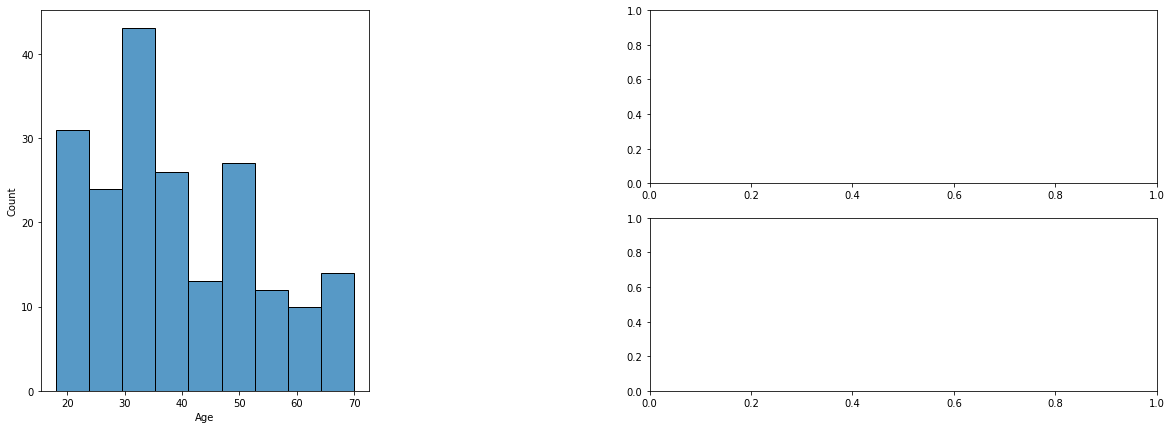

In [15]:
f, axes = plt.subplots(2,2 , figsize=(20, 7), sharex=False)
pos = 1
for i, feature in enumerate(continuous_features):

    plt.subplot(1 , 3 , pos)
    ax = sns.histplot(data=customer_df, x = feature,kde=False,palette="husl")
    ax.lines[0].set_color('crimson')
    pos = pos + 1

Above distribution shows that:
- The distribution of continuous features are normally distributed.


### Categorical Features

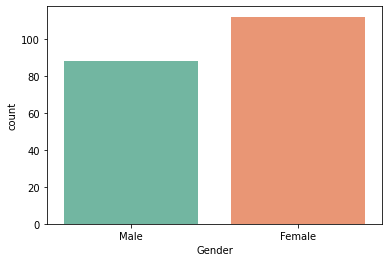

In [13]:
sns.countplot(x='Gender', data=customer_df, palette="Set2")
plt.show()

- Let's see how gender of customers affects to all other features.

In [ ]:
#Pairplot
sns.pairplot(customer_df,
             vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],
             kind ="reg",
             hue = "Gender",
             palette="husl",
             markers = ['o','D'])

plt.show()

- From the above pairplot we observe that green colour has higher ratio than pink colour as there are more female customers than male.

## Data Correlation

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other.

- A **positive** correlation indicates the extent to which those variables increase or decrease in parallel.
- A **negative** correlation indicates the extent to which one variable increases as the other decreases.

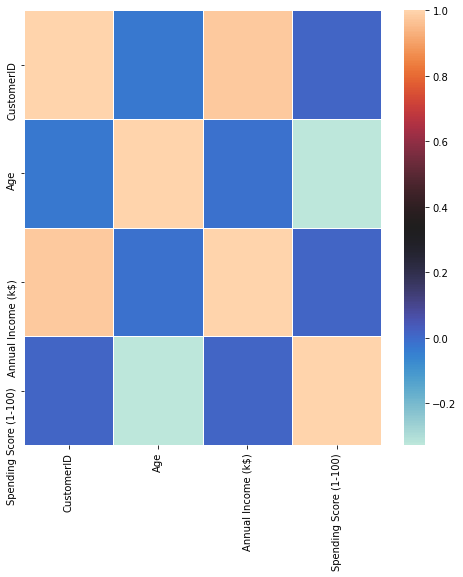

In [16]:
customer_corr = customer_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(customer_corr, cmap="icefire", linewidths=.5) 
plt.show()

# Feature Engineering

- All machine learning algorithms use input data to train a model. This input data comprise features, which are usually in the form of structured columns.
- Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises.
- Feature engineering mainly have two goals:
    1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
    2. Improving the performance of machine learning models.


## Drop Columns

In [17]:
customer_df.drop(columns='CustomerID',axis=1,inplace=True)

## Encoding Categorical Features

### What is Categorical Data?
- Categorical data are variables that contain label values rather than numeric values.
- The number of possible values is often limited to a fixed set.
- Categorical variables are often called nominal.

- Some examples include:
    - A “pet” variable with the values: “dog” and “cat“.
    - A “gender” variable with the values: “male“ and “female"
    - A “place” variable with the values: “first”, “second” and “third“.<br>
    Each value represents a different category.

- Some categories may have a natural relationship to each other, such as a natural ordering. The “place” variable above does have a natural ordering of values. This type of categorical variable is called an ordinal variable.

### What is the Problem with Categorical Data?

- Some algorithms can work with categorical data directly.
- Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
- In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.
- This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

### How to Convert Categorical Data to Numerical Data?
There are two ways:
- Integer Encoding
- One-Hot Encoding

**1. Integer Encoding**

- As a first step, each unique category value is assigned an integer value.
- For example, “red” is 1, “green” is 2, and “blue” is 3.
- This is called a **label encoding** or integer encoding and is easily reversible.
- For some variables, this may be enough.
- The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
- For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient

**2. One-Hot Encoding**

- For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.
- In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).
- In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.
- In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

<img src="https://etlpoint.com/wp-content/uploads/2020/07/77.png">

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
enc = OneHotEncoder()

In [20]:
enc.fit(customer_df.Gender.values.reshape(-1, 1))

OneHotEncoder()

In [21]:
enc.get_feature_names(['gender'])

array(['gender_Female', 'gender_Male'], dtype=object)

In [22]:
encoded_array = enc.transform(customer_df.Gender.values.reshape(-1, 1)).toarray()
customer_df['gender_Female'] = encoded_array[:,0]
customer_df['gender_Male'] = encoded_array[:,1]

- By reshaping array with `(-1, 1)`, the array gets reshaped in such a way that the resulting array has only 1 column.

In [23]:
customer_df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,Male,19,15,39,0.0,1.0
1,Male,21,15,81,0.0,1.0
2,Female,20,16,6,1.0,0.0
3,Female,23,16,77,1.0,0.0
4,Female,31,17,40,1.0,0.0
5,Female,22,17,76,1.0,0.0
6,Female,35,18,6,1.0,0.0
7,Female,23,18,94,1.0,0.0
8,Male,64,19,3,0.0,1.0
9,Female,30,19,72,1.0,0.0


In [24]:
customer_df.drop(columns='Gender',axis=1,inplace=True)

In [25]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0


# Model Development

In [26]:
model = KMeans(n_clusters=3, random_state=21)

## Elbow Method
The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.

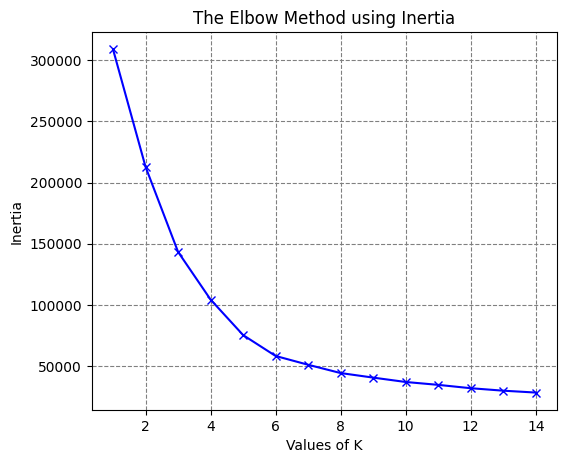

In [27]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmeans_model = KMeans(n_clusters=i, random_state=21)
    kmeans_model.fit(customer_df)
    inertia.append(kmeans_model.inertia_)

fig = plt.figure(figsize=(6,5),dpi=100)
plt.plot(range_val ,inertia,'bx-')
plt.grid(color="gray", linestyle='--')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Silhouette Score

Silhouette refers to a method of interpretation and validation of consistency within clusters of data.

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
kmeans_4 = KMeans(n_clusters=4, random_state=21)
kmeans_4.fit(customer_df)

KMeans(n_clusters=4, random_state=21)

In [30]:
# Let's plot the silhouette score as a function of k:
silhouette_score(customer_df, kmeans_4.labels_)

0.4051292479311983

In [31]:
# Create a list of hypotethical scenarios for different number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=21).fit(customer_df) for k in range(1, 10)]

In [32]:
silhouette_scores = [silhouette_score(customer_df, model.labels_) for model in kmeans_per_k[1:]]

In [33]:
silhouette_scores

[0.29298136996751367,
 0.38366377184202277,
 0.4051292479311983,
 0.4440235842895109,
 0.45176811980591935,
 0.4391492851945658,
 0.42561947555340185,
 0.41240340057294117]

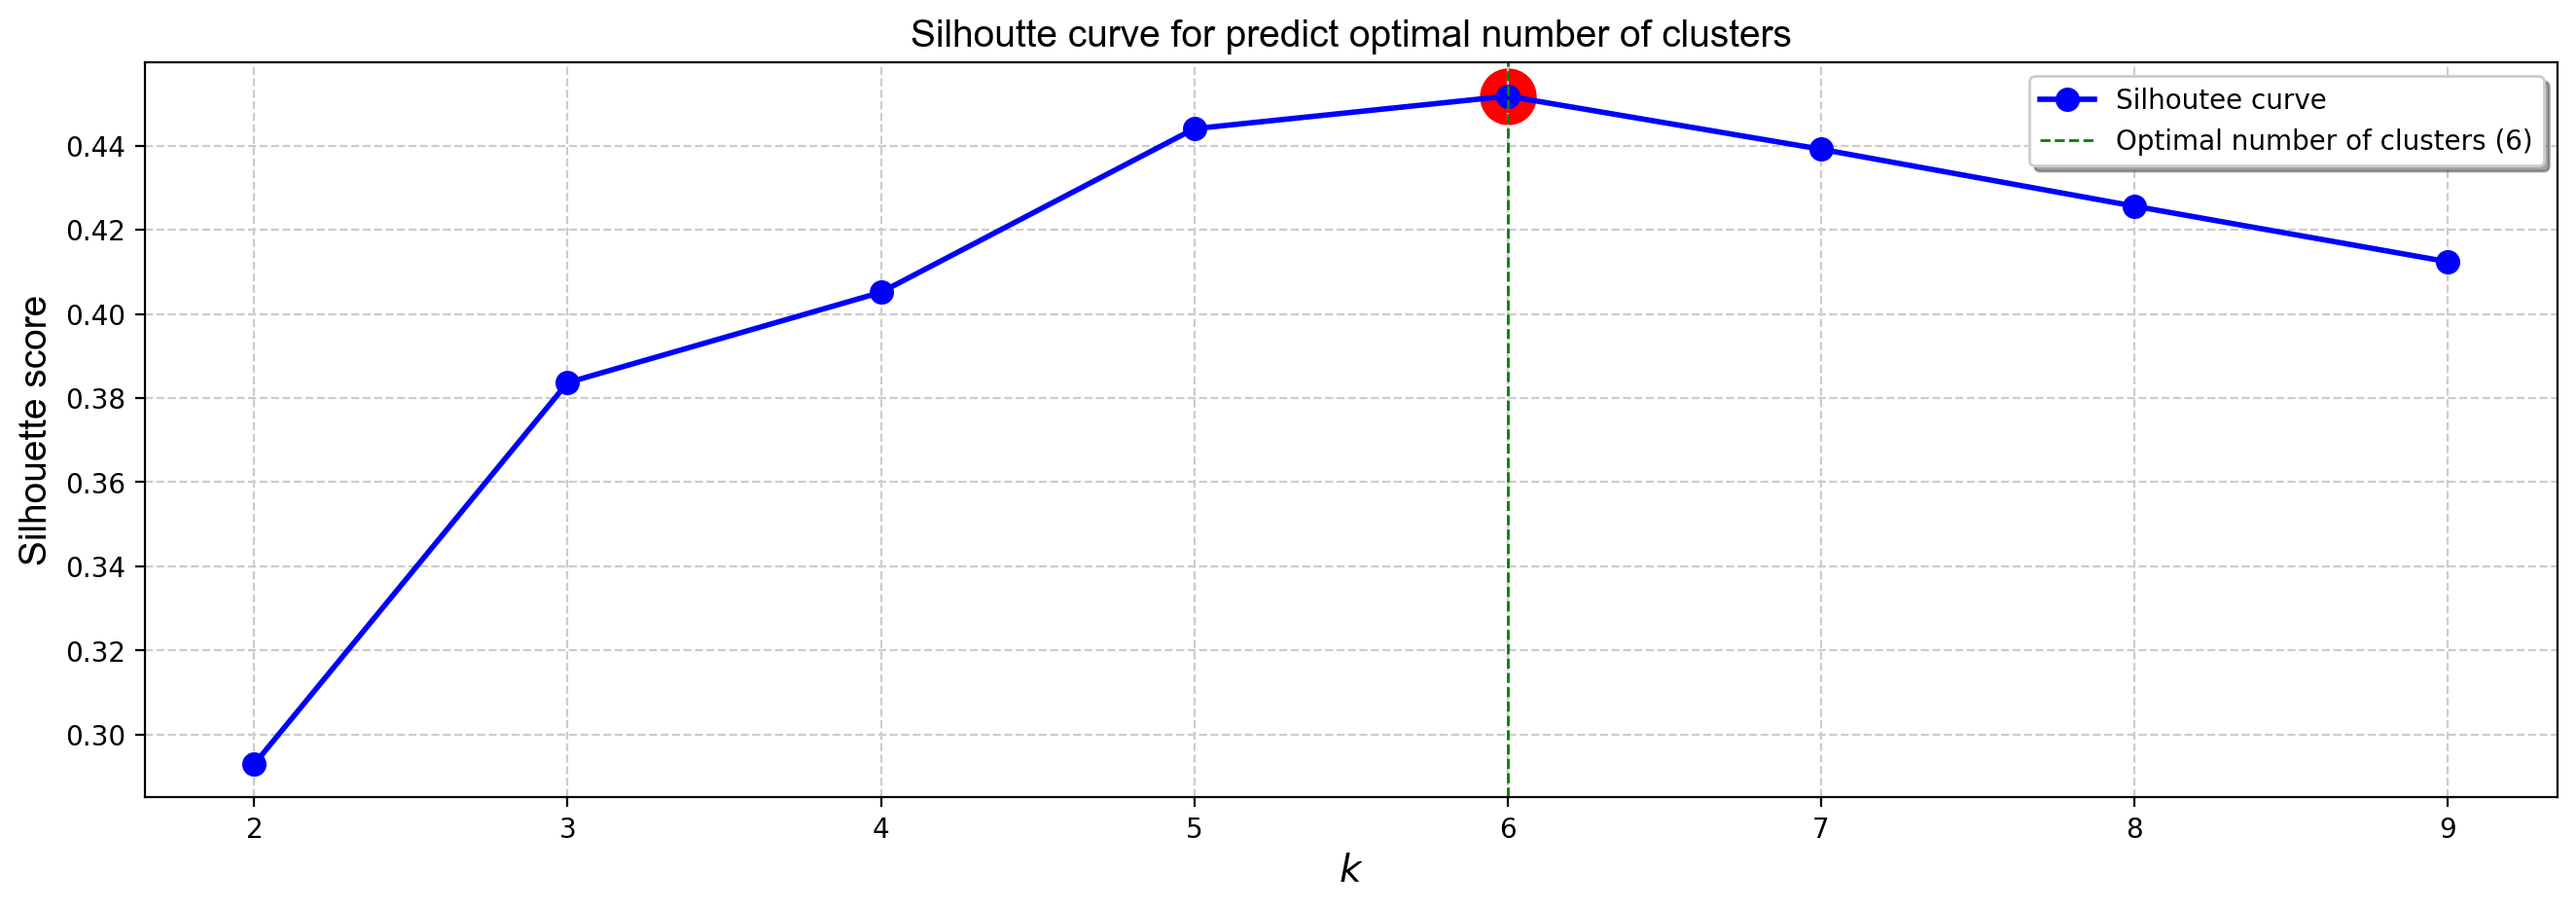

In [34]:
 # Plot the silhoutee scores graph
fig = plt.figure(figsize=(16,5),dpi=200)
plt.plot(range(2, 10), silhouette_scores, "b", marker = 'o', linewidth=2, markersize=8, label='Silhoutee curve')
plt.xlabel("$k$", fontsize=14, family='Arial')
plt.ylabel("Silhouette score", fontsize=14, family='Arial')
plt.grid(which='major', color="#cccccc", linestyle='--')
plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

# # Find the optimal number of cluster
# # Draw a vertical Line to mark optimal number of clusters
k=6
plt.axvline(x=6, linestyle='--', c='green', linewidth=1, 
            label='Optimal number of clusters ({})'.format(6))
plt.scatter(6, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

- From the above elbow method we see that **K = 6** is the best K value for our clustering

# Cluster Plots

In [35]:
# apply kmeans algorithm
kmeans_model=KMeans(6, random_state=21)
kmeans_clusters = kmeans_model.fit(customer_df)

In [36]:
kmeans_model.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 5,
       3, 0, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5,
       5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

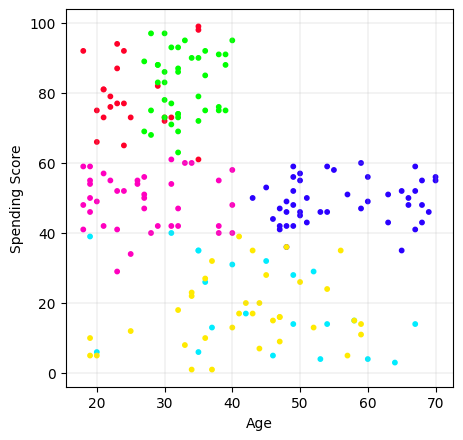

In [37]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(customer_df['Age'], customer_df['Spending Score (1-100)'], 
            c=kmeans_model.labels_, cmap='gist_rainbow', s=10)
plt.grid(linewidth = 0.2)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

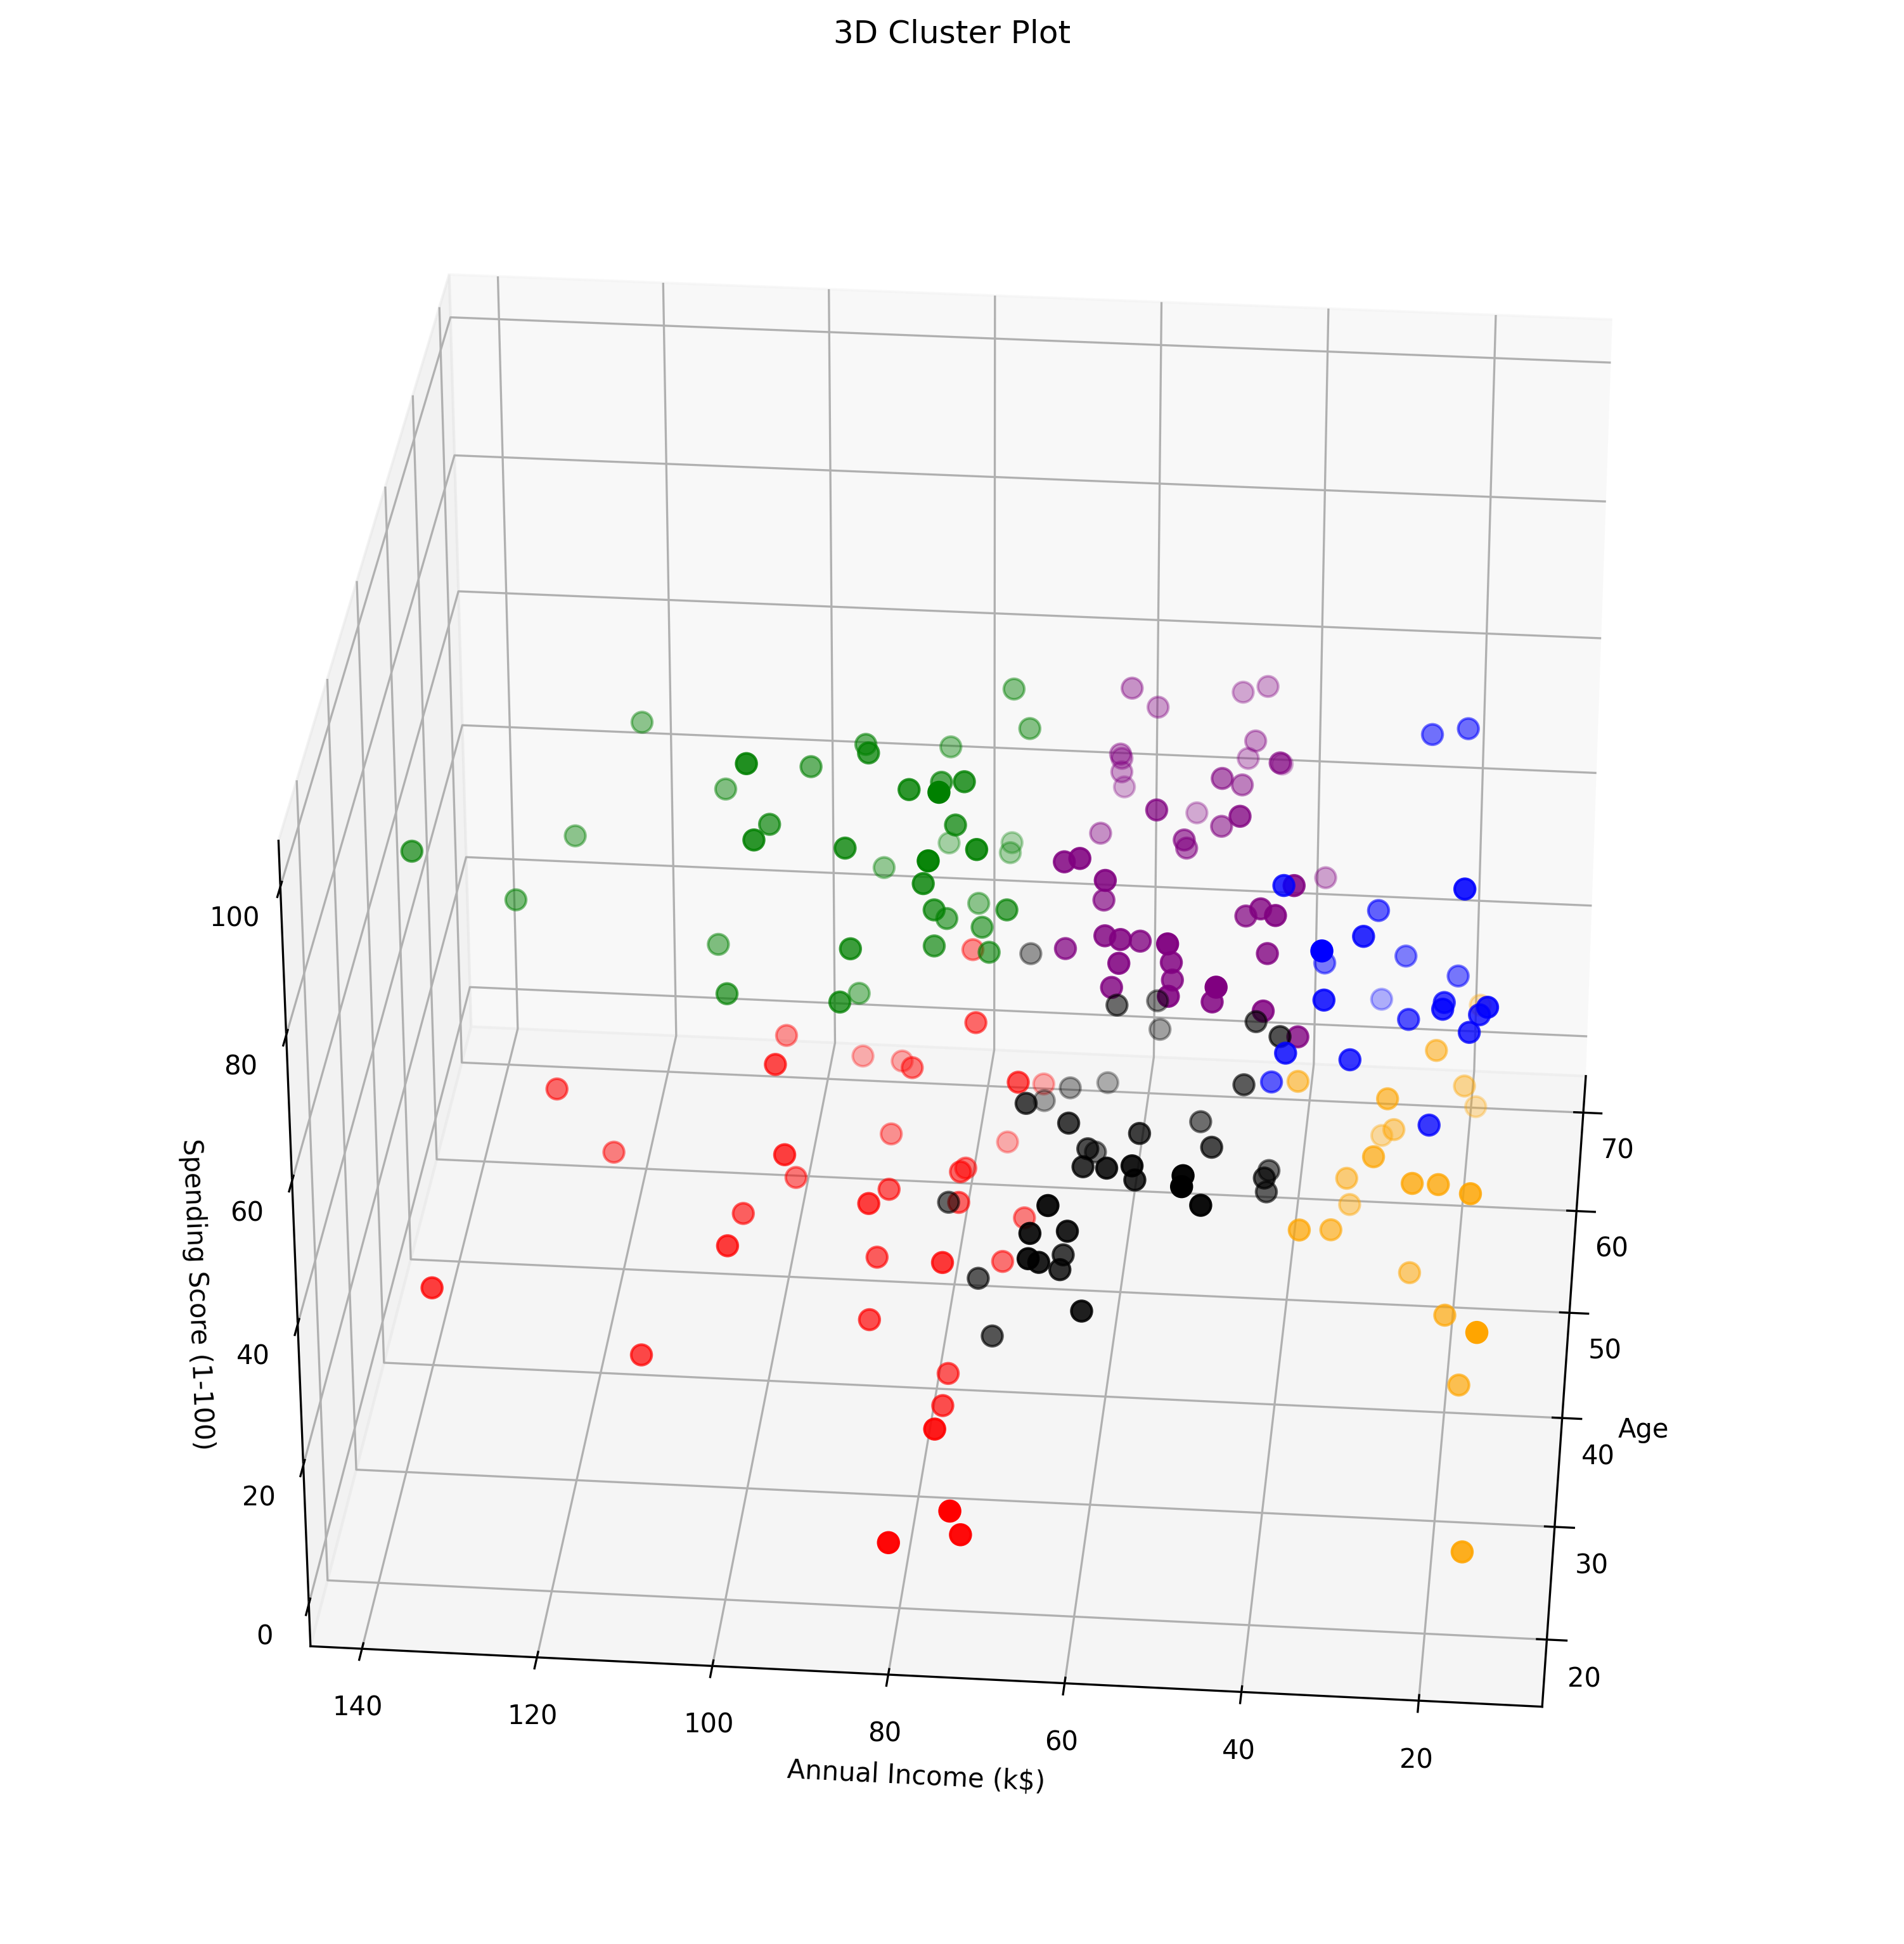

In [38]:
customer_df["label"] = kmeans_clusters.labels_
 
fig = plt.figure(figsize=(20,13), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_df.Age[customer_df.label == 0], 
           customer_df["Annual Income (k$)"][customer_df.label == 0], 
           customer_df["Spending Score (1-100)"][customer_df.label == 0], 
           c='blue', s=60)

ax.scatter(customer_df.Age[customer_df.label == 1],
           customer_df["Annual Income (k$)"][customer_df.label == 1],
           customer_df["Spending Score (1-100)"][customer_df.label == 1],
           c='red', s=60)

ax.scatter(customer_df.Age[customer_df.label == 2],
           customer_df["Annual Income (k$)"][customer_df.label == 2],
           customer_df["Spending Score (1-100)"][customer_df.label == 2],
           c='green', s=60)

ax.scatter(customer_df.Age[customer_df.label == 3],
           customer_df["Annual Income (k$)"][customer_df.label == 3],
           customer_df["Spending Score (1-100)"][customer_df.label == 3],
           c='orange', s=60)

ax.scatter(customer_df.Age[customer_df.label == 4],
           customer_df["Annual Income (k$)"][customer_df.label == 4],
           customer_df["Spending Score (1-100)"][customer_df.label == 4],
           c='purple', s=60)

ax.scatter(customer_df.Age[customer_df.label == 5],
           customer_df["Annual Income (k$)"][customer_df.label == 5],
           customer_df["Spending Score (1-100)"][customer_df.label == 5],
           c='black', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Cluster Plot")
plt.show()

# Bayesian Information Criterion (BIC)

Visual inspection of the cluster plots can be a good first start, especially if your data is 2- or 3-dimensional. Beyond that, visualization becomes trickier.

Let’s stop for a minute and ask ourselves what our brain is doing when we perform a visual inspection.
Our visual system is great at picking out contrasts. We are looking for contrasts in the density of points and then picking out spatially separated regions of high density. We then count the number of such regions we find. For points outside of one of these dense regions, we ask, “does this represent another cluster?” or “is this an outlier of one of the original clusters?”

Our brain is performing something like a Bayesian estimation here. We are really asking, “what is the probability that our data are explained by our model?” and “what’s the simplest possible model that explains our data?”

The first question is asking about the likelihood function, denoted by L. How likely is it that our data x are explained by the model M (e.g. some clustering approach), which has certain model parameters θ (like the centers and extents of the clusters).
When we’ve found the parameter values that maximize this probability, we denote them with a carat (^). This gives the “maximum likelihood function”, denoted by L with a carat.
<center><img src="https://miro.medium.com/max/432/0*kBCt8JkEoiG9Higi.png"></center>

We have to balance the maximum likelihood of our model, L, against the number of model parameters, k. We seek the model with the fewest number of parameters that still does a good job explaining the data. So we introduce a penalty for the number of model parameters.
We are now most of the way to the **Bayesian Information Criterion (BIC)**.

<center><img src="https://miro.medium.com/max/317/0*XnIxRHhbAhOjSbhh.png"></center>

The BIC balances the number of model parameters k and number of data points n against the maximum likelihood function, L. We seek to find the number of model parameters k that minimizes the BIC.

Computing the maximum likelihood function is the hard part, but there exist analytical functions for most common models. In linear regression, for example, the log-likelihood is just the mean squared error.

To calulate BIC we will cluster the data using a **[Gaussian Mixture model](https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture)** from sklearn and determine the best number of clusters to choose.

In [39]:
from sklearn.mixture import GaussianMixture

In [47]:
# Fit the data using a Gaussian mixture model and calculate the BIC for
# different numbers of clusters, ranging for 1 to 10
ks = np.arange(1,11)
bics = []
aics = []
for k in ks:
    model = GaussianMixture(n_components=k, covariance_type='full')
    model.fit(customer_df)
    bics.append(model.bic(customer_df)) # Calulate BIC
    aics.append(model.aic(customer_df)) # Calulate AIC

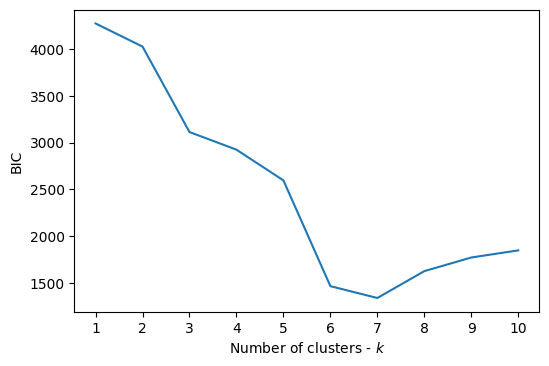

In [46]:
# Plot the BIC data    
fig = plt.figure(figsize=(6,4), dpi=100)
plt.plot(ks, bics)
plt.xlabel(r'Number of clusters - $k$')
plt.ylabel('BIC')
plt.xticks(ks)
plt.show()

As complexity of the model increases, BIC value increases and as likelihood increases, BIC decreases. So, **lower BIC is better**.

# Akaike information criterion (AIC)

AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same dataset. A **lower AIC score is better**.

AIC works by evaluating the model’s fit on the training data, and adding a penalty term for the complexity of the model (similar fundamentals to regularization). The desired result is to find the lowest possible AIC, which indicates the best balance of model fit with generalizability. This serves the eventual goal of maximizing fit on out-of-sample data.

<center><img src="https://miro.medium.com/max/338/0*Mqf5VTWo15HeZtqd"></center>

AIC uses a model’s maximum likelihood estimation (log-likelihood) as a measure of fit. Log-likelihood is a measure of how likely one is to see their observed data, given a model. The model with the [maximum likelihood](https://youtu.be/XepXtl9YKwc) is the one that “fits” the data the best. The natural log of the likelihood is used as a computational convenience. 

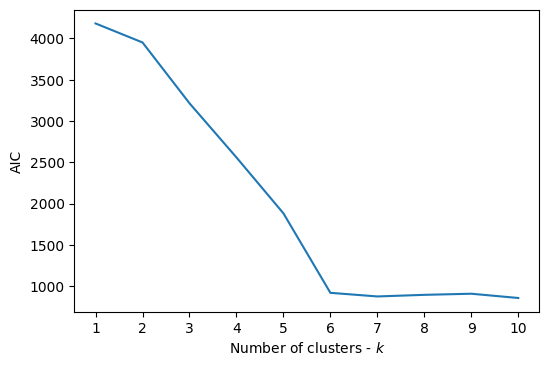

In [49]:
# Plot the AIC data    
fig = plt.figure(figsize=(6,4), dpi=100)
plt.plot(ks, aics)
plt.xlabel(r'Number of clusters - $k$')
plt.ylabel('AIC')
plt.xticks(ks)
plt.show()

**EXERCISE:** 
- Plot BIC and AIC plots side by side using subplots.
- Train kmeans model with 7 clusters and visualize the clusters side by side using subplots for k value 6 & 7, observe the difference.

In [52]:
## To get cluster labels from GM model
# model.predict(customer_df)